In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV , RandomizedSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix , ConfusionMatrixDisplay

Load Data :

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "covertype.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "zsinghrahulk/covertype-forest-cover-types",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)



100%|██████████| 11.2M/11.2M [00:00<00:00, 33.6MB/s]

Extracting zip of covertype.csv...


In [ ]:
df.shape

(581012, 52)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Elevation', 'Aspect',
       'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
 

In [ ]:
df.drop(columns=['Unnamed: 0' , 'Unnamed: 1' , 'Unnamed: 2'], inplace=True)

In [ ]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type1',
       'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6',
       'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
       'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
       'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
       'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
       'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
       'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
       'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
       'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
       'Soil_Type40', 'Cover_Type'],
      dtype='object')

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df.isna().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [ ]:
df['Cover_Type'].value_counts()

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


In [ ]:
  X = df.drop(columns=['Cover_Type'])
  y = df['Cover_Type']

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42 , stratify=y)

## Decision Tree

model with all featuers :

In [ ]:
destion_model = DecisionTreeClassifier(random_state=42)
destion_model.fit(X_train , y_train)
y_pred = destion_model.predict(X_test)
score = accuracy_score(y_test , y_pred)
print(f"Accuracy : {score}")

Accuracy : 0.9157508842284623


Desction tree Confusion Matrix :

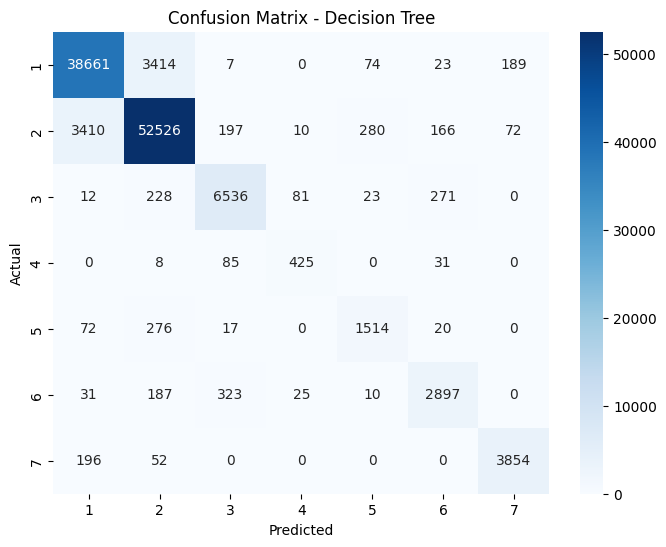

In [ ]:
cm = confusion_matrix(y_test , y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=destion_model.classes_,
            yticklabels=destion_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

classification Report :

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.91      0.91     42368
           2       0.93      0.93      0.93     56661
           3       0.91      0.91      0.91      7151
           4       0.79      0.77      0.78       549
           5       0.80      0.80      0.80      1899
           6       0.85      0.83      0.84      3473
           7       0.94      0.94      0.94      4102

    accuracy                           0.92    116203
   macro avg       0.87      0.87      0.87    116203
weighted avg       0.92      0.92      0.92    116203



Feature Importance :

In [ ]:
importances = destion_model.feature_importances_
features = X.columns

feat_importances = pd.Series(importances, index=features).sort_values(ascending=False)

print("\n🔝 Top 15 Features by Importance:")
print(feat_importances.head(15))




🔝 Top 15 Features by Importance:
Hillshade_9am                       0.198701
Slope                               0.180712
Elevation                           0.083011
Aspect                              0.076412
Wilderness_Area                     0.068791
Horizontal_Distance_To_Hydrology    0.059188
Vertical_Distance_To_Hydrology      0.057248
Horizontal_Distance_To_Roadways     0.048074
Soil_Type22                         0.022957
Soil_Type12                         0.019556
Soil_Type23                         0.017430
Soil_Type39                         0.016973
Soil_Type38                         0.016447
Hillshade_Noon                      0.016446
Soil_Type4                          0.016163
dtype: float64


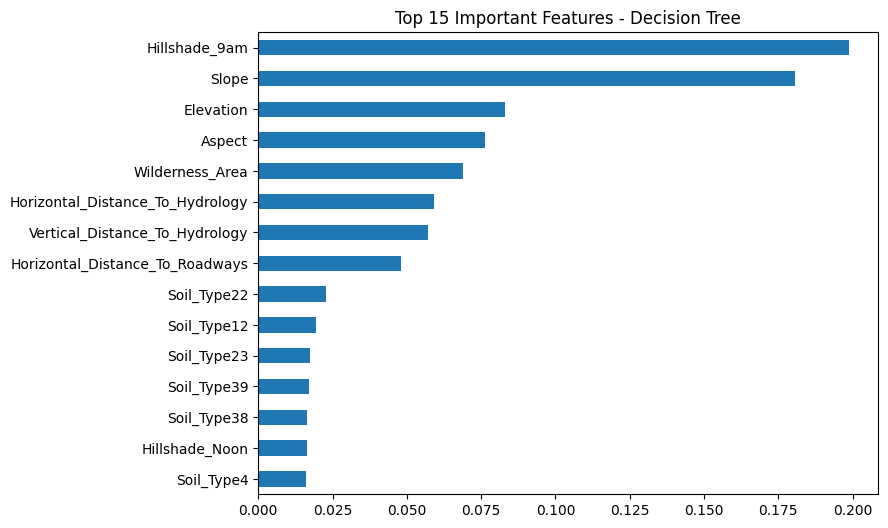

In [ ]:
feat_importances.head(15).plot(kind="barh", figsize=(8,6))
plt.gca().invert_yaxis()
plt.title("Top 15 Important Features - Decision Tree")
plt.show()

model with important featuers :

In [ ]:
top15_features = [
    "Hillshade_9am",
    "Slope",
    "Elevation",
    "Aspect",
    "Wilderness_Area",
    "Horizontal_Distance_To_Hydrology",
    "Vertical_Distance_To_Hydrology",
    "Horizontal_Distance_To_Roadways",
    "Soil_Type22",
    "Soil_Type12",
    "Soil_Type23",
    "Soil_Type39",
    "Soil_Type38",
    "Hillshade_Noon",
    "Soil_Type4"
]

In [ ]:
X_important = df[top15_features]
y_important = df['Cover_Type']


split the data :

In [ ]:
X_timportant_train , X_timportant_test , y_timportant_train , y_timportant_test = train_test_split(X_important , y_important , test_size=0.2 , random_state=42 , stratify=y_important)

In [ ]:
important_model = DecisionTreeClassifier(random_state=42)
important_model.fit(X_timportant_train , y_timportant_train)
y_pred_important = important_model.predict(X_timportant_test)

In [ ]:
important_score = accuracy_score(y_timportant_test , y_pred_important)
print(f"Accuracy : {important_score}")

Accuracy : 0.878944605560958


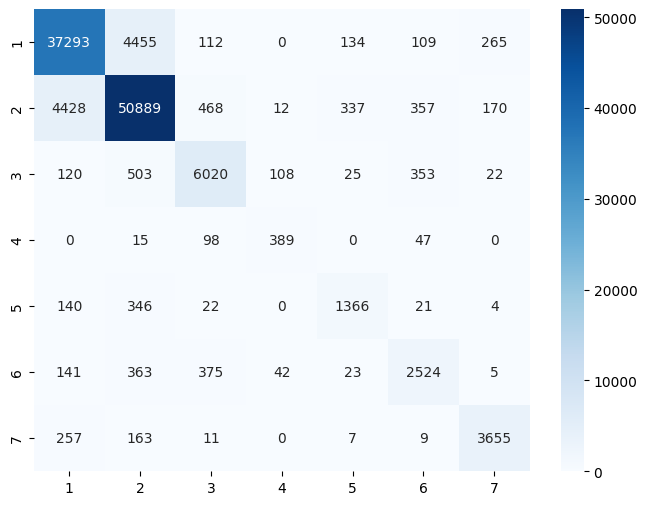

In [ ]:
cm_im = confusion_matrix(y_timportant_test , y_pred_important)
plt.figure(figsize=(8,6))
sns.heatmap(cm_im, annot=True, fmt="d", cmap="Blues",
            xticklabels=important_model.classes_,
            yticklabels=important_model.classes_)
plt.show()

# Random Forest:

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train , y_train)
y_pred_rf = random_forest_model.predict(X_test)

In [ ]:
random_forest_score = accuracy_score(y_test , y_pred_rf)
print(f"Accuracy : {random_forest_score}")

Accuracy : 0.9368949166544753


classification Report :

In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           1       0.95      0.92      0.93     42368
           2       0.93      0.96      0.95     56661
           3       0.92      0.94      0.93      7151
           4       0.90      0.81      0.86       549
           5       0.94      0.74      0.83      1899
           6       0.91      0.85      0.88      3473
           7       0.97      0.94      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.93      0.88      0.90    116203
weighted avg       0.94      0.94      0.94    116203



# Gradient Boosting (GBM) :

In [ ]:
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train , y_train)
y_pred_gb = gradient_boosting_model.predict(X_test)

In [ ]:
gradient_boosting_score = accuracy_score(y_test , y_pred_gb)
print(f"Accuracy : {gradient_boosting_score}")

Accuracy : 0.7040609967040438


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))


Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.55      0.63     42368
           2       0.69      0.84      0.76     56661
           3       0.71      0.83      0.76      7151
           4       0.73      0.65      0.69       549
           5       0.71      0.17      0.28      1899
           6       0.67      0.35      0.46      3473
           7       0.82      0.67      0.74      4102

    accuracy                           0.70    116203
   macro avg       0.72      0.58      0.62    116203
weighted avg       0.71      0.70      0.69    116203



# CatBoost model :

In [ ]:
CatBoost_model = GradientBoostingClassifier(random_state=42)
CatBoost_model.fit(X_train , y_train)
y_pred_cb = CatBoost_model.predict(X_test)

In [ ]:
CatBoost_score = accuracy_score(y_test , y_pred_cb)
print(f"Accuracy : {CatBoost_score}")

Accuracy : 0.7040609967040438


In [ ]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_cb))


Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.55      0.63     42368
           2       0.69      0.84      0.76     56661
           3       0.71      0.83      0.76      7151
           4       0.73      0.65      0.69       549
           5       0.71      0.17      0.28      1899
           6       0.67      0.35      0.46      3473
           7       0.82      0.67      0.74      4102

    accuracy                           0.70    116203
   macro avg       0.72      0.58      0.62    116203
weighted avg       0.71      0.70      0.69    116203



# Tree Base models with Hyperparameter tuning :

In [ ]:
X_pr = df.drop(columns=['Cover_Type'])
y_pr = df['Cover_Type']

In [ ]:
X_pr_train , X_pr_test , y_pr_train , y_pr_test = train_test_split(X_pr , y_pr , test_size=0.2 , random_state=42 , stratify=y_pr)


Decision Tree :

In [ ]:
dt_params = {
    "max_depth": [5, 10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

In [ ]:
dt_grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    dt_params,
    cv=3, n_jobs=-1, scoring="accuracy"
)

In [ ]:
dt_grid.fit(X_pr_train , y_pr_train)
print("Best Decision Tree:", dt_grid.best_params_)
print("Accuracy:", dt_grid.score(X_pr_test, y_pr_test))

Best Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.9157508842284623


Random Forest :

In [ ]:
rf_params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [ ]:
rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_params,
    n_iter=10, cv=3, n_jobs=-2, scoring="accuracy", random_state=42
)

In [ ]:
rf_random.fit(X_pr_train, y_pr_train)
print("Best Random Forest:", rf_random.best_params_)
print("Accuracy:", rf_random.score(X_pr_test, y_pr_test))

Best Random Forest: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Accuracy: 0.9235131623107837


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00
